Number of records: 34594


<Figure size 1200x600 with 0 Axes>

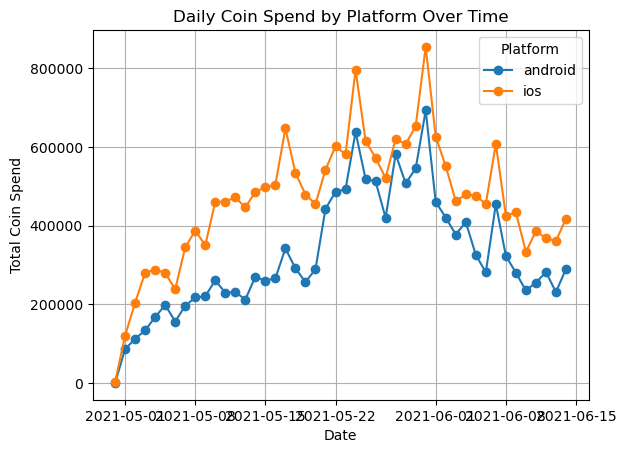

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery as bq

# Connect to BigQuery
client = bq.Client.from_service_account_json("C:\\Users\\GalipŞahin\\Desktop\\Kişisel\\Dream\\galipsahin15.json")

# Query the data
query = """ SELECT * FROM `casedreamgames.Analytics.dataset_coin_spend` """
df = client.query(query).to_dataframe()

# Take a random 1% sample
df_sample = df.sample(frac=0.01)

# Print the number of records
print(f"Number of records: {len(df_sample)}")

# Convert the date format
df_sample['event_time'] = pd.to_datetime(df_sample['event_time'])

# Calculate daily platform spend
df_sample.set_index('event_time', inplace=True)
platform_coin_spend = df_sample.groupby([df_sample.index.date, 'platform'])['coin_amount'].sum().unstack().fillna(0)

# Plot daily platform coin spend
plt.figure(figsize=(12, 6))
platform_coin_spend.plot(kind='line', marker='o')
plt.title('Daily Coin Spend by Platform Over Time')
plt.xlabel('Date')
plt.ylabel('Total Coin Spend')
plt.grid(True)
plt.legend(title='Platform')
plt.show()


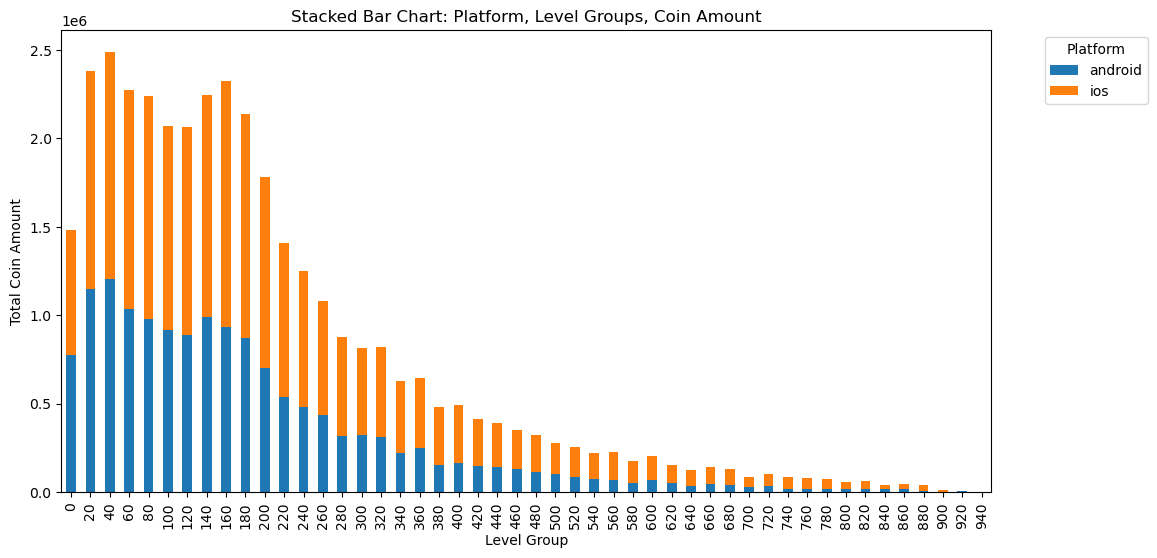

In [4]:
# Group levels into groups of 20
df_sample['level_group'] = (df_sample['level'] // 20) * 20

# Group level and coin_amount by platform
platform_level_coin = df_sample.groupby(['platform', 'level_group'])['coin_amount'].sum().unstack().fillna(0)

# Stacked bar chart
ax = platform_level_coin.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Platform, Level Groups, Coin Amount')
plt.xlabel('Level Group')
plt.ylabel('Total Coin Amount')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


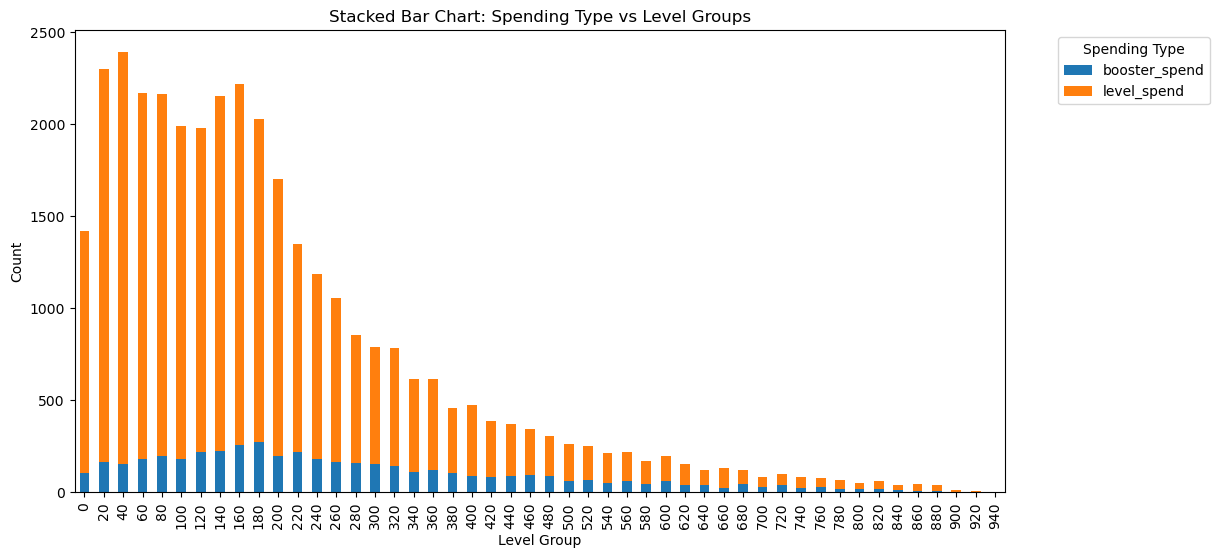

In [5]:
# Group levels into groups of 20
df_sample['level_group'] = (df_sample['level'] // 20) * 20

# Calculate the relationship between level and spending type
spending_type_level = df_sample.groupby(['spending_type', 'level_group']).size().unstack().fillna(0)

# Stacked bar chart showing the relationship between spending type and level
spending_type_level.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Spending Type vs Level Groups')
plt.xlabel('Level Group')
plt.ylabel('Count')
plt.legend(title='Spending Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
